#  Analisis Tarifas

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [3]:
data= pd.read_csv('DATA_FINAL_08.csv',sep=';', header = 0)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (3,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
len(data)

3748392

In [5]:
data.shape

(3748392, 87)

In [6]:
data.describe()

,CUENTA,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,SIN_MOTIVO,...,OP_CLARO,CANTIDAD,PENETRACION,OCUPACION_DW,OCUPACION_UP,ALFA,BETA,MEGA,NIVEL_ALARMA_MALO,NIVEL_ALARMA_BUENO
count,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,...,3.691531e+06,3.691531e+06,3.391975e+06,3.614554e+06,3.662728e+06,3.162999e+06,3.507214e+06,3.221058e+06,3.691531e+06,3.691531e+06
mean,5.021393e+07,-1.504672e-02,-5.203565e-03,-1.582225e-02,-4.220476e-04,-4.578763e-03,-1.319766e-02,-5.989768e-03,-3.430804e-03,-5.514871e-02,...,1.181265e+00,2.144164e+00,3.906250e-01,5.084993e-01,4.494307e-01,1.271766e+00,1.338653e+00,9.790414e-01,8.096045e-02,5.952885e-01
std,2.850738e+07,1.241560e-01,7.226600e-02,1.257225e-01,2.069474e-02,6.785440e-02,1.147941e-01,7.759589e-02,5.899487e-02,2.299634e-01,...,1.410256e+00,1.219985e+00,2.403954e+00,1.560323e-01,1.508046e-01,1.965219e+00,1.722602e+00,7.281601e-01,4.924042e-01,1.157517e+00
min,3.070000e+02,-9.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-6.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.376013e-02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.563920e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,3.077778e-01,4.013881e-01,3.423322e-01,4.642514e-01,8.435897e-01,4.591879e-01,0.000000e+00,0.000000e+00
50%,4.730464e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,2.000000e+00,3.678161e-01,5.081735e-01,4.427638e-01,9.256882e-01,1.112853e+00,8.373859e-01,0.000000e+00,0.000000e+00
75%,7.657398e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000e+00,3.000000e+00,4.435484e-01,6.138598e-01,5.512111e-01,1.648786e+00,1.485097e+00,1.357674e+00,0.000000e+00,1.000000e+00
max,9.969995e+07,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.200000e+01,1.200000e+01,3.125000e+03,1.045716e+00,1.063611e+00,3.215254e+02,1.840000e+02,3.435232e+01,1.000000e+01,1.200000e+01


# PLAN
    1. listar Nodos
    2. Calcular medida tarifa
    3. Ordenar en pivot por mes
    4. Calcular dif Ene_Mayo y dif Ene_Nov
    5. Agrupar
    6. Identificar causas (arbol, cluster u otros)
    
##  Tener en cuenta campos
* 'CD_BLANCOS_CAMBIOS_SERVICIO'
* analisis diferentes por INVOLUNTARIO



In [7]:
data.columns

Index(['CUENTA', 'COD_SERVICIO', 'Velocidad', 'Internet', 'COD_NODO',
       'ESTRATO', 'CARTERA', 'CONGELACION', 'VIAJES', 'CAPACIDAD_DE_PAGO',
       'CAUSAS_EXTERNAS', 'COMPETENCIA', 'MAL_SERVICIO', 'NO_UTILIZAR',
       'NO_GUSTO', 'SIN_MOTIVO', 'SIN_CONTACTO', 'TRASLADOS', 'OTROS',
       'CD_BLANCOS_CAMBIOS_OTROS', 'CAMBIO_DE_SERVICIO', 'CAMBIO_TARIFA',
       'EMPAQUETAMIENTO', 'CESION_DE_CONTRATO', 'UNIFICACION_EMPAQUETAMIENTO',
       'CD_BLANCOS_CAMBIOS_SERVICIO', 'FECHA', 'CHURN_TEMPRANO',
       'INVOLUNTARIO', 'VOLUNTARIO', 'TIPO_RAZON', 'CANTIDAD_LLAMADAS',
       'CANTIDAD_ADMIN', 'CANTIDAD_TECNICO', 'CAMPANA_HBO', 'CAMPANA_FOX',
       'CAMPANA_ADULTO', 'CAMPANA_EQUIPOS_ADIC', 'CAMPANA_ULTRAWIFI',
       'CAMPANA_VOZ', 'CAMPANA_RETENCION', 'CAMPANA_AFECTACION_SRV',
       'PART_CANT_CALL', 'CANT_USER', 'PROM_VEL', 'VEL_ME_8', 'VEL_10_25',
       'VEL_30', 'VEL_40_50', 'VEL_MA_60', 'CONVERGENTE', 'PROM_VEL_HOGAR',
       'MEDIANA_VEL', 'PROM_RENTA', 'PRECIO_MEGA_CLARO_1'

In [8]:
data.head()

,CUENTA,COD_SERVICIO,Velocidad,Internet,COD_NODO,ESTRATO,CARTERA,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,...,ALFA,BETA,MEGA,NIVEL_ALARMA_MALO,NIVEL_ALARMA_BUENO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO
0,88384766,NB2,@,50,ZG2,3,0,0,0,0,...,1.027704,1.438391,0.714482,0.0,2.0,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN SUR,MEDELLIN,MEDELLIN SURORIENTAL
1,92228220,DV3,NaN,60,HBP1,3,0,0,0,0,...,0.542274,1.309582,0.414081,0.0,0.0,REGION CENTRO,BOGOTA OCCIDENTE,SABANA OCCIDENTE,MADRID,MADRID
2,48074413,5BA,NaN,5,PPA4D,3,0,0,0,0,...,3.211042,1.116071,2.877093,0.0,0.0,REGION COSTA,COSTA NORTE,CESAR,VALLEDUPAR,CESAR DISTRITO 1
3,2139171,SUD,@,10,9BZ,2,0,0,0,0,...,1.117672,1.008526,1.108223,0.0,3.0,REGION CENTRO,BOGOTA SUR,BOSA,BOGOTA,ROMA
4,14885225,D3V,@,160,SNJ,4,0,0,0,0,...,0.739663,0.734568,1.006936,0.0,0.0,REGION ORIENTE,SANBOY,BUCARAMANGA-METROPOLITANA,BUCARAMANGA,DISTRITO BGA 1


In [9]:
data[['INVOLUNTARIO','VOLUNTARIO']].value_counts().to_frame().sort_index()

,,0
INVOLUNTARIO,VOLUNTARIO,
-1.0,0,3748392


In [77]:
data['CARTERA'].unique()

array([0, -1, 1, 2, 6, -4, 3, -12, -2, 5, 4, '0', '-1', '3', '2', '1',
       '4', '5', 'NG', -9, -6, -25, -3, -16, -36], dtype=object)

In [11]:
data[['FECHA']].value_counts()

FECHA
6        608997
5        410284
7        354526
3        348981
4        345570
8        330090
11       305675
10       291903
9        290993
1        235981
2        225392
dtype: int64

In [12]:
# Seleccion variables para medida tarifa

In [13]:
seleccion_variables=['COD_NODO','FECHA','INVOLUNTARIO','CD_BLANCOS_CAMBIOS_SERVICIO','AVG_TARIFA_TIGO','AVG_TARIFA_ETB','AVG_TARIFA_MOVISTAR','PROM_RENTA']
# no hay precio mega Movistart

In [14]:
data[seleccion_variables].sort_values('COD_NODO')

,COD_NODO,FECHA,INVOLUNTARIO,CD_BLANCOS_CAMBIOS_SERVICIO,AVG_TARIFA_TIGO,AVG_TARIFA_ETB,AVG_TARIFA_MOVISTAR,PROM_RENTA
3738959,01J,4,-1.0,0,NaN,NaN,NaN,104638.0
2802211,01J,5,-1.0,0,NaN,NaN,NaN,109851.0
2161052,01J,6,-1.0,0,NaN,NaN,NaN,108074.0
1472829,01J,2,-1.0,0,NaN,NaN,NaN,104127.0
563004,01J,3,-1.0,0,NaN,NaN,NaN,106836.0
...,...,...,...,...,...,...,...,...
3206210,ago-01,4,-1.0,0,NaN,NaN,NaN,NaN
1731867,ago-01,8,-1.0,0,NaN,NaN,NaN,NaN
3205922,ago-01,4,-1.0,0,NaN,NaN,NaN,NaN
2844943,ago-01,9,-1.0,0,NaN,NaN,NaN,NaN


In [15]:
data[seleccion_variables].isnull().sum()

COD_NODO                             0
FECHA                                0
INVOLUNTARIO                         0
CD_BLANCOS_CAMBIOS_SERVICIO          0
AVG_TARIFA_TIGO                1628362
AVG_TARIFA_ETB                 3056626
AVG_TARIFA_MOVISTAR            1805643
PROM_RENTA                       56861
dtype: int64

In [16]:
data[seleccion_variables].isnull().sum()/len(data)

COD_NODO                       0.000000
FECHA                          0.000000
INVOLUNTARIO                   0.000000
CD_BLANCOS_CAMBIOS_SERVICIO    0.000000
AVG_TARIFA_TIGO                0.434416
AVG_TARIFA_ETB                 0.815450
AVG_TARIFA_MOVISTAR            0.481711
PROM_RENTA                     0.015169
dtype: float64

In [17]:
data[seleccion_variables].describe()

,FECHA,INVOLUNTARIO,CD_BLANCOS_CAMBIOS_SERVICIO,AVG_TARIFA_TIGO,AVG_TARIFA_ETB,AVG_TARIFA_MOVISTAR,PROM_RENTA
count,3.748392e+06,3748392.0,3748392.0,2.120030e+06,691766.000000,1.942749e+06,3.691531e+06
mean,6.094396e+00,-1.0,0.0,1.240184e+05,92945.781526,1.035222e+05,1.017697e+05
std,2.876352e+00,0.0,0.0,1.277989e+04,19723.153231,9.704424e+03,1.740937e+04
min,1.000000e+00,-1.0,0.0,7.199000e+04,79900.000000,7.199000e+04,1.134200e+04
25%,4.000000e+00,-1.0,0.0,1.171429e+05,79900.000000,9.790000e+04,8.991400e+04
50%,6.000000e+00,-1.0,0.0,1.264706e+05,79900.000000,1.054000e+05,1.010430e+05
75%,8.000000e+00,-1.0,0.0,1.300000e+05,113233.333333,1.129000e+05,1.114260e+05
max,1.100000e+01,-1.0,0.0,1.635700e+05,149900.000000,1.129000e+05,2.421450e+05


In [18]:
#alfa=com/nuestro

In [19]:
data_medida=data[seleccion_variables].copy()

In [20]:
variables_tarifa=['AVG_TARIFA_TIGO','AVG_TARIFA_ETB','AVG_TARIFA_MOVISTAR']

In [21]:
data_medida['comp_tarifa']=data_medida[variables_tarifa].min(axis=1)

In [22]:
data_medida['operador_menor_tarifa']=np.where(data_medida['comp_tarifa']==data_medida['AVG_TARIFA_TIGO'],'AVG_TARIFA_TIGO',
                                              np.where(data_medida['comp_tarifa']==data_medida['AVG_TARIFA_ETB'],'AVG_TARIFA_ETB',
                                                      np.where(data_medida['comp_tarifa']==data_medida['AVG_TARIFA_MOVISTAR'],'AVG_TARIFA_MOVISTAR','NINGUNO'
                                             )))

In [23]:
data_medida['ALFA_tarifa']=np.where(data_medida['operador_menor_tarifa']=='NINGUNO',np.nan,data_medida['comp_tarifa']/data_medida['PROM_RENTA'])

In [24]:
data_medida

,COD_NODO,FECHA,INVOLUNTARIO,CD_BLANCOS_CAMBIOS_SERVICIO,AVG_TARIFA_TIGO,AVG_TARIFA_ETB,AVG_TARIFA_MOVISTAR,PROM_RENTA,comp_tarifa,operador_menor_tarifa,ALFA_tarifa
0,ZG2,8,-1.0,0,NaN,NaN,NaN,133632.0,NaN,NINGUNO,NaN
1,HBP1,3,-1.0,0,NaN,NaN,NaN,107735.0,NaN,NINGUNO,NaN
2,PPA4D,3,-1.0,0,NaN,NaN,NaN,102163.0,NaN,NINGUNO,NaN
3,9BZ,8,-1.0,0,125714.285714,79900.0,108614.285714,89209.0,79900.000000,AVG_TARIFA_ETB,0.895650
4,SNJ,7,-1.0,0,140000.000000,NaN,112900.000000,105915.0,112900.000000,AVG_TARIFA_MOVISTAR,1.065949
...,...,...,...,...,...,...,...,...,...,...,...
3748387,1GV,11,-1.0,0,NaN,NaN,NaN,95346.0,NaN,NINGUNO,NaN
3748388,CVB,11,-1.0,0,NaN,NaN,NaN,126325.0,NaN,NINGUNO,NaN
3748389,BTC,6,-1.0,0,126250.000000,79900.0,109150.000000,92790.0,79900.000000,AVG_TARIFA_ETB,0.861084
3748390,P04,9,-1.0,0,135523.333333,NaN,90656.666667,103679.0,90656.666667,AVG_TARIFA_MOVISTAR,0.874398


In [28]:
resumen_medida=pd.pivot_table(data_medida[['FECHA','COD_NODO','ALFA_tarifa']], columns='FECHA', index='COD_NODO',aggfunc=np.mean)
resumen_medida.columns = resumen_medida.columns.droplevel()
resumen_medida

FECHA,1,2,3,4,5,6,7,8,9,10
COD_NODO,,,,,,,,,,
01S,NaN,NaN,0.875348,0.871263,1.209064,0.863952,0.860241,NaN,NaN,1.035875
02S,1.274914,0.907934,1.277684,1.258177,1.259581,1.270295,1.254361,0.909536,1.103387,0.957562
0AL,NaN,NaN,0.738222,NaN,0.728679,0.539047,0.760157,NaN,NaN,0.474946
0AO,0.810964,NaN,0.988197,1.077074,NaN,NaN,NaN,NaN,0.680075,NaN
0AR,1.284109,1.216581,1.298053,1.183848,1.104240,1.320534,1.172261,1.336661,1.033125,1.029064
...,...,...,...,...,...,...,...,...,...,...
ZUL,1.063994,NaN,1.671811,1.072029,1.091996,1.088498,1.090459,1.112140,1.159577,1.121575
ZVD,0.986515,0.960976,0.974316,0.979039,0.931441,0.957367,0.953681,0.961424,0.894125,0.844062
ZVG,1.172341,1.176593,1.132425,1.066752,1.174378,1.166202,1.072115,1.195050,1.040057,1.041562


In [29]:
data_medida[data_medida['COD_NODO']=='01S'].sort_values('FECHA')

,COD_NODO,FECHA,INVOLUNTARIO,CD_BLANCOS_CAMBIOS_SERVICIO,AVG_TARIFA_TIGO,AVG_TARIFA_ETB,AVG_TARIFA_MOVISTAR,PROM_RENTA,comp_tarifa,operador_menor_tarifa,ALFA_tarifa
925942,01S,1,-1.0,0,NaN,NaN,NaN,89601.0,NaN,NINGUNO,NaN
1020694,01S,1,-1.0,0,NaN,NaN,NaN,89601.0,NaN,NINGUNO,NaN
1003990,01S,1,-1.0,0,NaN,NaN,NaN,89601.0,NaN,NINGUNO,NaN
993910,01S,1,-1.0,0,NaN,NaN,NaN,89601.0,NaN,NINGUNO,NaN
972454,01S,1,-1.0,0,NaN,NaN,NaN,89601.0,NaN,NINGUNO,NaN
...,...,...,...,...,...,...,...,...,...,...,...
956036,01S,11,-1.0,0,NaN,NaN,NaN,90819.0,NaN,NINGUNO,NaN
957764,01S,11,-1.0,0,NaN,NaN,NaN,90819.0,NaN,NINGUNO,NaN
960932,01S,11,-1.0,0,NaN,NaN,NaN,90819.0,NaN,NINGUNO,NaN
935732,01S,11,-1.0,0,NaN,NaN,NaN,90819.0,NaN,NINGUNO,NaN


In [30]:
resumen_medida.isnull().sum()

FECHA
1     2963
2     3006
3     2811
4     2640
5     2765
6     2574
7     2342
8     2387
9     2071
10    2183
dtype: int64

In [31]:
resumen_medida.isnull().sum()/len(resumen_medida)

FECHA
1     0.305338
2     0.309769
3     0.289674
4     0.272053
5     0.284934
6     0.265251
7     0.241344
8     0.245981
9     0.213417
10    0.224959
dtype: float64

<AxesSubplot:xlabel='FECHA'>

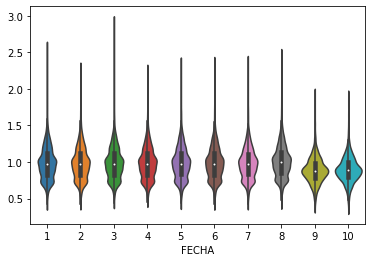

In [32]:
sns.violinplot(data=resumen_medida)

In [33]:
resumen_medida['ene_oct']=resumen_medida[10]-resumen_medida[1]
resumen_medida['ene_may']=resumen_medida[5]-resumen_medida[1]

In [34]:
resumen_medida.describe()

FECHA,1,2,3,4,5,6,7,8,9,10,ene_oct,ene_may
count,6741.000000,6698.000000,6893.000000,7064.000000,6939.000000,7130.000000,7362.000000,7317.000000,7633.000000,7521.000000,5716.000000,5517.000000
mean,0.986862,0.986459,0.986282,0.985155,0.989091,0.985250,0.981769,1.007998,0.889634,0.896673,-0.096479,-0.007082
std,0.222228,0.219783,0.218010,0.216290,0.218906,0.217622,0.211938,0.214597,0.172056,0.169832,0.170847,0.177239
min,0.424251,0.427115,0.443353,0.459624,0.432857,0.421675,0.423495,0.432636,0.367525,0.346936,-0.964745,-1.020891
25%,0.824723,0.824866,0.828721,0.824852,0.829139,0.826536,0.830247,0.854087,0.782884,0.790782,-0.199995,-0.061030
50%,0.976559,0.974808,0.974402,0.976436,0.977812,0.973474,0.973728,0.998418,0.880032,0.887263,-0.111612,0.000709
75%,1.127861,1.122591,1.120084,1.120176,1.123003,1.117394,1.111162,1.135050,0.991742,0.997337,0.015904,0.047504
max,2.567901,2.282624,2.918921,2.256057,2.353665,2.362262,2.378556,2.472470,1.943738,1.918936,0.371453,0.670422


<AxesSubplot:xlabel='FECHA'>

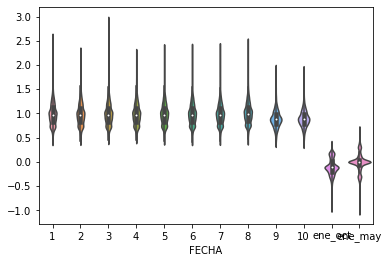

In [35]:
sns.violinplot(data=resumen_medida)

In [36]:
resumen_medida

FECHA,1,2,3,4,5,6,7,8,9,10,ene_oct,ene_may
COD_NODO,,,,,,,,,,,,
01S,NaN,NaN,0.875348,0.871263,1.209064,0.863952,0.860241,NaN,NaN,1.035875,NaN,NaN
02S,1.274914,0.907934,1.277684,1.258177,1.259581,1.270295,1.254361,0.909536,1.103387,0.957562,-0.317352,-0.015333
0AL,NaN,NaN,0.738222,NaN,0.728679,0.539047,0.760157,NaN,NaN,0.474946,NaN,NaN
0AO,0.810964,NaN,0.988197,1.077074,NaN,NaN,NaN,NaN,0.680075,NaN,NaN,NaN
0AR,1.284109,1.216581,1.298053,1.183848,1.104240,1.320534,1.172261,1.336661,1.033125,1.029064,-0.255045,-0.179869
...,...,...,...,...,...,...,...,...,...,...,...,...
ZUL,1.063994,NaN,1.671811,1.072029,1.091996,1.088498,1.090459,1.112140,1.159577,1.121575,0.057581,0.028003
ZVD,0.986515,0.960976,0.974316,0.979039,0.931441,0.957367,0.953681,0.961424,0.894125,0.844062,-0.142453,-0.055074
ZVG,1.172341,1.176593,1.132425,1.066752,1.174378,1.166202,1.072115,1.195050,1.040057,1.041562,-0.130779,0.002037


In [37]:
resumen_medida.isnull().sum()

FECHA
1          2963
2          3006
3          2811
4          2640
5          2765
6          2574
7          2342
8          2387
9          2071
10         2183
ene_oct    3988
ene_may    4187
dtype: int64

In [38]:
resumen_medida.isnull().sum()/len(resumen_medida)

FECHA
1          0.305338
2          0.309769
3          0.289674
4          0.272053
5          0.284934
6          0.265251
7          0.241344
8          0.245981
9          0.213417
10         0.224959
ene_oct    0.410965
ene_may    0.431472
dtype: float64

In [39]:
resumen_medida['bin_alfa']=pd.cut((resumen_medida['ene_oct']),bins=5,right=True)

In [40]:
resumen_medida['bin_alfa'].value_counts().to_frame().sort_index()

,bin_alfa
"(-0.966, -0.698]",5
"(-0.698, -0.43]",119
"(-0.43, -0.163]",1772
"(-0.163, 0.104]",2823
"(0.104, 0.371]",997


## opcion2

In [41]:
resumen_medida['ene_oct'].quantile(0.05)

-0.3596412692566014

###  Segunda parte

In [42]:
seleccionVariables=['CONGELACION','VIAJES','CAPACIDAD_DE_PAGO','CAUSAS_EXTERNAS','COMPETENCIA','MAL_SERVICIO','NO_UTILIZAR',
                    'NO_GUSTO','SIN_MOTIVO','SIN_CONTACTO','TRASLADOS','OTROS','CAMBIO_DE_SERVICIO','CAMBIO_TARIFA','EMPAQUETAMIENTO',
                    'CESION_DE_CONTRATO','UNIFICACION_EMPAQUETAMIENTO']

# Sin 'CD_BLANCOS_CAMBIOS_OTROS'

### Pregunta
* tome la diferencia de enero a oct.  Debo tomar el cambio de tendencia?

In [43]:
data_causal=data.merge(resumen_medida[['ene_oct']], left_on='COD_NODO', right_index=True, how='left')

In [44]:
data_causal['ET']=np.where(data_causal['ene_oct']<=-0.5,1,0)

In [45]:
data_causal['ET'].value_counts()

0    3730860
1      17532
Name: ET, dtype: int64

In [46]:
data_causal['ET'].value_counts()/len(data_causal)

0    0.995323
1    0.004677
Name: ET, dtype: float64

## Fase 2
* Caracterizar Casos Graves
* Arboles

In [47]:
data_causal

,CUENTA,COD_SERVICIO,Velocidad,Internet,COD_NODO,ESTRATO,CARTERA,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,...,MEGA,NIVEL_ALARMA_MALO,NIVEL_ALARMA_BUENO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO,ene_oct,ET
0,88384766,NB2,@,50,ZG2,3,0,0,0,0,...,0.714482,0.0,2.0,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN SUR,MEDELLIN,MEDELLIN SURORIENTAL,NaN,0
1,92228220,DV3,NaN,60,HBP1,3,0,0,0,0,...,0.414081,0.0,0.0,REGION CENTRO,BOGOTA OCCIDENTE,SABANA OCCIDENTE,MADRID,MADRID,NaN,0
2,48074413,5BA,NaN,5,PPA4D,3,0,0,0,0,...,2.877093,0.0,0.0,REGION COSTA,COSTA NORTE,CESAR,VALLEDUPAR,CESAR DISTRITO 1,NaN,0
3,2139171,SUD,@,10,9BZ,2,0,0,0,0,...,1.108223,0.0,3.0,REGION CENTRO,BOGOTA SUR,BOSA,BOGOTA,ROMA,-0.139428,0
4,14885225,D3V,@,160,SNJ,4,0,0,0,0,...,1.006936,0.0,0.0,REGION ORIENTE,SANBOY,BUCARAMANGA-METROPOLITANA,BUCARAMANGA,DISTRITO BGA 1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748387,90354179,PH5,@,5,1GV,2,0,0,0,0,...,1.686854,0.0,2.0,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN NORTE,BELLO,BELLO NORTE,NaN,0
3748388,8087598,CMB,@,100,CVB,4,0,0,0,0,...,2.063867,0.0,2.0,REGION ORIENTE,SANBOY,BUCARAMANGA-METROPOLITANA,FLORIDABLANCA,DISTRITO FLORIDA 1,NaN,0
3748389,71164933,R30,@,30,BTC,2,0,0,0,0,...,0.441224,0.0,0.0,REGION CENTRO,BOGOTA SUR,BOSA,BOGOTA,ROMA,0.160395,0
3748390,71189674,5BA,@,5,P04,4,0,0,0,0,...,1.873057,0.0,1.0,REGION ORIENTE,SANBOY,BUCARAMANGA-METROPOLITANA,BUCARAMANGA,DISTRITO BGA 3,-0.078399,0


In [48]:
data_causal[seleccionVariables].describe()

,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,SIN_MOTIVO,SIN_CONTACTO,TRASLADOS,OTROS,CAMBIO_DE_SERVICIO,CAMBIO_TARIFA,EMPAQUETAMIENTO,CESION_DE_CONTRATO,UNIFICACION_EMPAQUETAMIENTO
count,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3748392.0,3.748392e+06,3748392.0,3.748392e+06,3748392.0,3748392.0,3.748392e+06
mean,-1.504672e-02,-5.203565e-03,-1.582225e-02,-4.220476e-04,-4.578763e-03,-1.319766e-02,-5.989768e-03,-3.430804e-03,-5.514871e-02,-1.234396e-03,0.0,-1.677253e-03,0.0,-7.176411e-05,0.0,0.0,-5.975896e-05
std,1.241560e-01,7.226600e-02,1.257225e-01,2.069474e-02,6.785440e-02,1.147941e-01,7.759589e-02,5.899487e-02,2.299634e-01,3.527904e-02,0.0,4.208976e-02,0.0,9.137688e-03,0.0,0.0,7.900836e-03
min,-9.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-6.000000e+00,-4.000000e+00,0.0,-3.000000e+00,0.0,-3.000000e+00,0.0,0.0,-2.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00
max,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00


In [62]:
data_causal[seleccionVariables]=data_causal[seleccionVariables]*-1

In [63]:
data_causal['BAJAS TOTAL']=data_causal[seleccionVariables].sum(axis=1)

<AxesSubplot:xlabel='ET', ylabel='BAJAS TOTAL'>

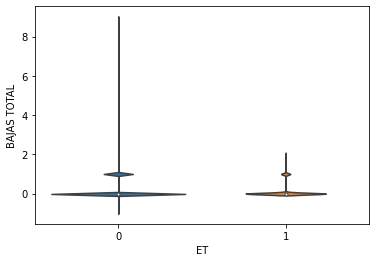

In [64]:
#data_causal['ET','BAJAS TOTAL']
sns.violinplot(data=data_causal, x="ET", y="BAJAS TOTAL")

<AxesSubplot:>

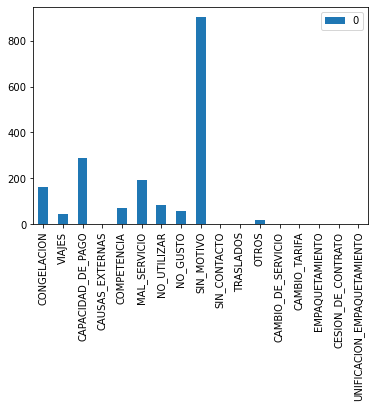

In [65]:
data_causal[data_causal['ET']==1][seleccionVariables].sum().to_frame().plot.bar()

<AxesSubplot:>

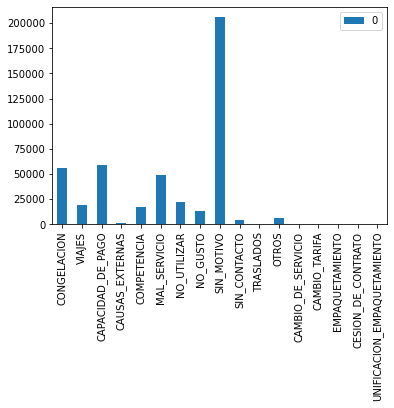

In [66]:
data_causal[data_causal['ET']==0][seleccionVariables].sum().to_frame().plot.bar()

In [67]:
resumen_causa=data_causal[seleccionVariables].sum().to_frame()
resumen_causa=resumen_causa.merge(data_causal[data_causal['ET']==1][seleccionVariables].sum().to_frame(), left_index=True,right_index=True, how='left')
resumen_causa=resumen_causa.merge(data_causal[data_causal['ET']==0][seleccionVariables].sum().to_frame(), left_index=True,right_index=True, how='left')
resumen_causa.columns=['total','critico','normal']
resumen_causa

,total,critico,normal
CONGELACION,56401,164,56237
VIAJES,19505,47,19458
CAPACIDAD_DE_PAGO,59308,290,59018
CAUSAS_EXTERNAS,1582,0,1582
COMPETENCIA,17163,69,17094
MAL_SERVICIO,49470,191,49279
NO_UTILIZAR,22452,85,22367
NO_GUSTO,12860,58,12802
SIN_MOTIVO,206719,902,205817
SIN_CONTACTO,4627,0,4627


In [69]:
x = resumen_causa.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
resumen_causa_nor = pd.DataFrame(x_scaled)
resumen_causa_nor.index=resumen_causa.index
resumen_causa_nor.columns=resumen_causa.columns
resumen_causa_nor=resumen_causa_nor.sort_values('total', ascending=False)
resumen_causa_nor

,total,critico,normal
SIN_MOTIVO,1.000000,1.000000,1.000000
CAPACIDAD_DE_PAGO,0.286902,0.321508,0.286750
CONGELACION,0.272839,0.181818,0.273238
MAL_SERVICIO,0.239310,0.211752,0.239431
NO_UTILIZAR,0.108611,0.094235,0.108674
VIAJES,0.094355,0.052106,0.094540
COMPETENCIA,0.083026,0.076497,0.083054
NO_GUSTO,0.062210,0.064302,0.062201
OTROS,0.030413,0.022173,0.030449
SIN_CONTACTO,0.022383,0.000000,0.022481


<Figure size 432x288 with 0 Axes>

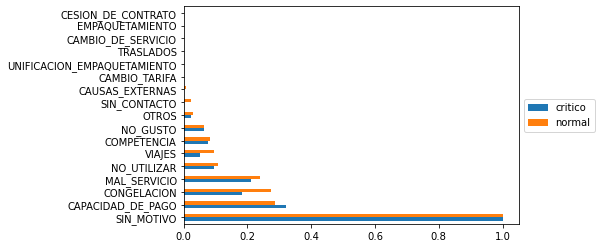

In [70]:
f = plt.figure()
resumen_causa_nor[['critico','normal']].plot.barh();
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [71]:
resumen_causa_nor['dif']=resumen_causa_nor['critico']-resumen_causa_nor['normal']

In [72]:
resumen_causa_nor=resumen_causa_nor.sort_values('dif', ascending=False)
resumen_causa_nor

,total,critico,normal,dif
CAPACIDAD_DE_PAGO,0.286902,0.321508,0.286750,0.034758
NO_GUSTO,0.062210,0.064302,0.062201,0.002101
SIN_MOTIVO,1.000000,1.000000,1.000000,0.000000
EMPAQUETAMIENTO,0.000000,0.000000,0.000000,0.000000
CAMBIO_DE_SERVICIO,0.000000,0.000000,0.000000,0.000000
TRASLADOS,0.000000,0.000000,0.000000,0.000000
CESION_DE_CONTRATO,0.000000,0.000000,0.000000,0.000000
UNIFICACION_EMPAQUETAMIENTO,0.001084,0.000000,0.001088,-0.001088
CAMBIO_TARIFA,0.001301,0.000000,0.001307,-0.001307
COMPETENCIA,0.083026,0.076497,0.083054,-0.006558


<AxesSubplot:>

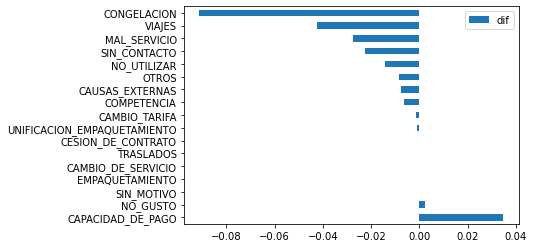

In [73]:
# Diferencia entre críticos y normales
resumen_causa_nor[['dif']].plot.barh()

## ARBOL

In [74]:
def visualizarArbol(model_fit,depth):
    fig, ax = plt.subplots(figsize=(depth*10,10))
    print(f"Profundidad del árbol: {tree_model.get_depth()}")
    print(f"Número de nodos terminales: {tree_model.get_n_leaves()}")
    plot = plot_tree(
                decision_tree = tree_model,
                feature_names = seleccionVariables,
                class_names   = ['normal','critico'],
                filled        = True,
                impurity      = False,
                fontsize      = 10,
                precision     = 3,
                ax            = ax
           )

Profundidad del árbol: 5
Número de nodos terminales: 7


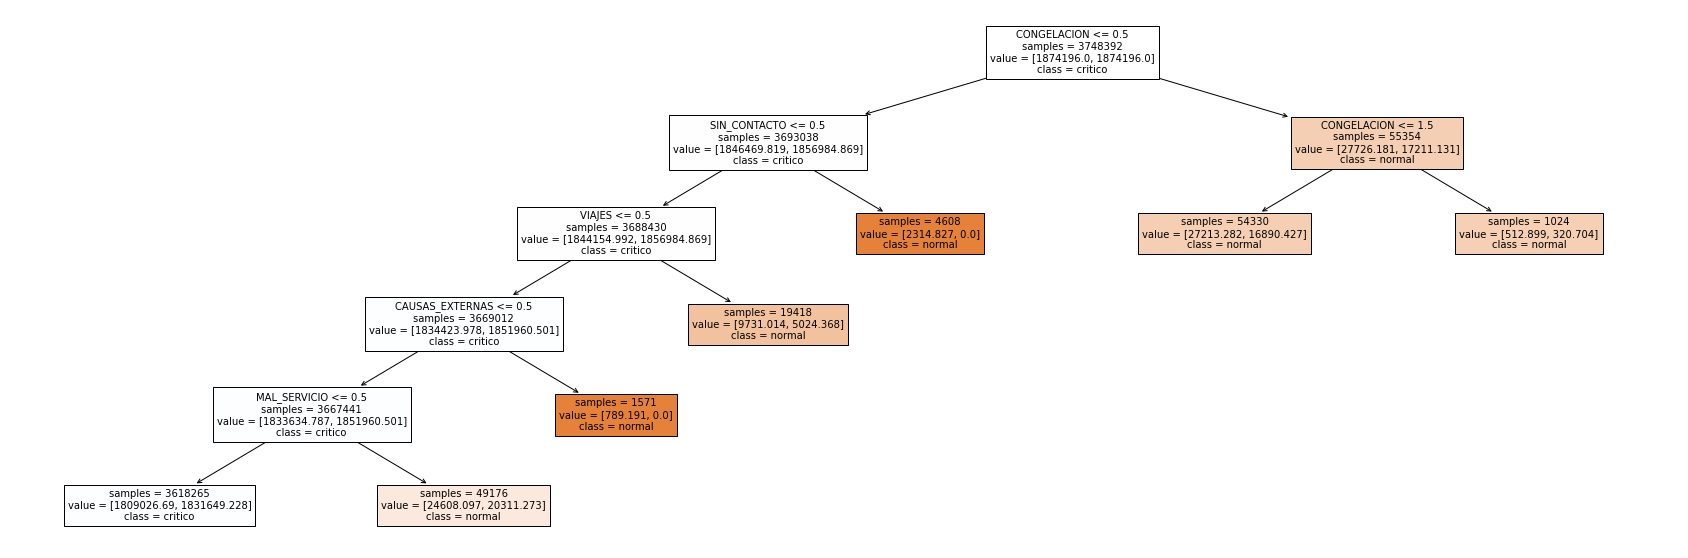

In [75]:
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5,min_samples_leaf=500, class_weight='balanced')
model_fit = tree_model.fit(X = data_causal[seleccionVariables], y = data_causal["ET"])
visualizarArbol(model_fit,3)

### Próximos pasos
* diferenciar entre voluntarios e involuntarios
* quitar variable blanco
* validar cambio tendencia ene-may